In [190]:
import pandas as pd
import matplotlib.pyplot as plt



In [191]:
name = 'val_seen'
id2cid = pd.read_csv('./id2cid.csv')
data = pd.read_csv(f'../data/{name}.csv')
data.head(5)

,user_id,course_id
0,56dae2b74e3ef90900b7bd0e,5b61928a8011d1001e356102
1,60e66f29be3e3b0006c4db75,559e49185850311000fca504
2,5c919efb728ddf00208b9b2b,60ddc3ca06259d00064c7f17 60aeac37bca91777bf5bb...
3,5ac115507997a2001e7c3617,58d5c70c27ea7d070060160e
4,5f53b84440c5be3bb873a9d3,5f55fb39b34335d28416bd0c


In [192]:
id2cid = list(id2cid['course_id'])
cid2id = {x: i  for i, x in enumerate(id2cid)}

# counts = [0 for _ in range(len(id2cid))]
# for i in range(len(data)):
#     for x in data['course_id'][i].split(' '):
#         counts[cid2id[x]] += 1
# pivot = sorted(counts)[-100]
# mask = [x >= pivot for x in counts]
# print(sum(mask), 'classes is preserved, others are dropped.')

# id2cid = [x for x, y in zip(id2cid, mask) if y]
# cid2id = {x: i  for i, x in enumerate(id2cid)}
dropped = 0
for i in range(len(data)):
    tmp = []
    for x in data['course_id'][i].split(' '):
        if x in cid2id:
            tmp.append(cid2id[x])
        else:
            dropped += 1
    if not tmp:
        data['course_id'][i] = ['x']
    else:
        data['course_id'][i] = tmp
data = data.assign(course_taken = [len(x) for x in data['course_id']])
# data = data[data['course_taken'] != 0]
data.reset_index(drop=True, inplace=True)

print(data.head(5))
print('(courses x people)', sum(data['course_taken']), 'taken,', dropped, 'dropped')

                    user_id course_id  course_taken
0  56dae2b74e3ef90900b7bd0e       [x]             1
1  60e66f29be3e3b0006c4db75       [x]             1
2  5c919efb728ddf00208b9b2b       [x]             1
3  5ac115507997a2001e7c3617       [x]             1
4  5f53b84440c5be3bb873a9d3       [x]             1
(courses x people) 10056 taken, 12512 dropped


In [193]:
# data.plot() # except 3 outlier, other people takes 60 classes at most
data.describe()

,course_taken
count,7748.000000
mean,1.297883
std,1.033109
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000


,number
count,50.000000
mean,106.100000
std,126.083913
min,0.000000
25%,31.750000
50%,61.000000
75%,120.250000
max,492.000000


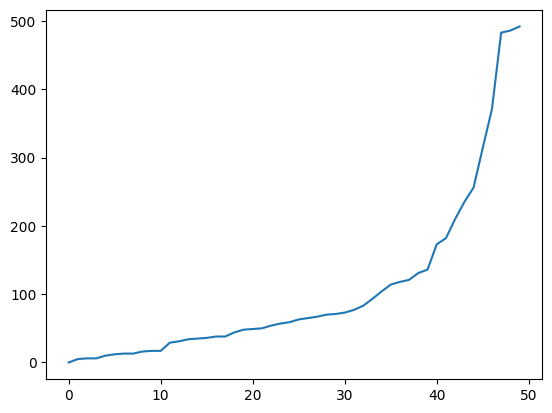

In [194]:
courses = [0 for _ in range(len(id2cid))]
for i in range(len(data)):
    for x in data['course_id'][i]:
        if x == 'x':
            break
        courses[x] += 1
plt.plot([i for i in range(len(courses))], sorted(courses))

if isinstance(courses, list):
    courses = [[x] for x in courses]
    courses = pd.DataFrame(courses, columns=['number'])
courses.describe()


In [195]:
preprocessed_data = data.copy()
for i in range(len(preprocessed_data)):
    preprocessed_data['course_id'][i] = ' '.join(str(x) for x in preprocessed_data['course_id'][i])
preprocessed_data.to_csv(f'./{name}_preprocessed.csv', index=False, columns=['user_id', 'course_id'])
df = pd.read_csv(f'./{name}_preprocessed.csv')
print(df.head(5))
print(df['course_id'][0].split(' '))

/tmp/ipykernel_977615/2789301022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_data['course_id'][i] = ' '.join(str(x) for x in preprocessed_data['course_id'][i])


                    user_id course_id
0  56dae2b74e3ef90900b7bd0e         x
1  60e66f29be3e3b0006c4db75         x
2  5c919efb728ddf00208b9b2b         x
3  5ac115507997a2001e7c3617         x
4  5f53b84440c5be3bb873a9d3         x
['x']


In [196]:
user = pd.read_csv('../data/users_preprocessed.csv', usecols=['user_id', 'gender', 'interests'])
train = pd.read_csv(f'./{name}_preprocessed.csv', usecols=['user_id', 'course_id'])
user.head(5)

,user_id,gender,interests
0,54ccaa73a784960a00948687,0,26 7 39 28 3 5 6 31 4 21
1,54dca4456d7d350900e86bae,1,28 3 33 23 25 31 39 32 7 55 4
2,54e421bac5c9c00900cd8d47,0,3 14 4 6 20 11
3,54e961d4c5c9c00900cd8d84,2,2 8 5 43 36 18 55
4,54e9b744c5c9c00900cd8d8a,2,32 2 5 25 45 18


In [197]:
train.head(5)

,user_id,course_id
0,56dae2b74e3ef90900b7bd0e,x
1,60e66f29be3e3b0006c4db75,x
2,5c919efb728ddf00208b9b2b,x
3,5ac115507997a2001e7c3617,x
4,5f53b84440c5be3bb873a9d3,x


In [198]:
merged = pd.merge(train, user, on='user_id')
merged = merged.reindex(columns=['user_id', 'gender', 'interests', 'course_id'])
merged.head(5)
merged.to_csv(f'./{name}_preprocessed.csv', index=False, columns=['user_id', 'gender', 'interests', 'course_id'])
df = pd.read_csv(f'./{name}_preprocessed.csv')
df.head(5)

,user_id,gender,interests,course_id
0,56dae2b74e3ef90900b7bd0e,0,23 50 51 1 25,x
1,60e66f29be3e3b0006c4db75,0,62 57 41 2 24 3 27 5 16 11 66 4 59 22 12 87 83...,x
2,5c919efb728ddf00208b9b2b,1,1 19 6 23 25 17 11 14 7 4 53 85 10 24 29 8 9 3...,x
3,5ac115507997a2001e7c3617,3,25 23 32 17,x
4,5f53b84440c5be3bb873a9d3,1,82 76 61 36 24 43 55 71 81 41 1 8,x
